**Описание проекта**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Сборный проект 1

**Цель: Выявить факторы, определяющие успешность будущего проекта**


**Шаг 1. Начало работы**

**Шаг 2. Подготовка данных**
   * 2.1 Замените названия столбцов (приведите к нижнему регистру).
   * 2.2 Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему.
   * 2.3 Обработайте пропуски при необходимости.
   * 2.4 Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

**Шаг 3. Исследовательский анализ данных**
   * 3.1 Сколько игр выпускалось в разные годы.
   * 3.2 Как менялись продажи по платформам.
   * 3.3 Выбрать актуальный период.
   * 3.4 Какие платформы лидируют по продажам, растут или падают?
   * 3.5 Глобальные проажи игр в разбивке по платформам.
   * 3.6 Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
   * 3.7 Выводы с продажами игр на других платформах.
   * 3.8 Общее распределение игр по жанрам.

**Шаг 4. Портрет пользователя каждого региона**
   * 4.1 Самые популярные платформы (топ-5). 
   * 4.2 Самые популярные жанры (топ-5). 
   * 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 5. Проверка гипотез** 
   * 5.1 Средние пользовательские рейтинги жанров Action и Sports одинаковые
   * 5.2 Средние пользовательские рейтинги платформ Xbox One и PC разные

**Шаг 6. Общий вывод**


## Начало работы 

**Импортируем необходимые библиотеки и открываем датасет**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats as st
from scipy.stats import ttest_1samp, ttest_ind



In [2]:
data = pd.read_csv('/datasets/games.csv')
#data.head(10)


## Работа с данными

### Заменим названия столбцов

In [3]:
data = data.rename(columns={"Name": "name", 
                     "Platform": "platform",
                     "Year_of_Release": "year_of_release",
                     "Genre": "genre",
                     "NA_sales": "na_sales",
                     "EU_sales": "eu_sales",
                     "JP_sales": "jp_sales",
                     "Other_sales": "other_sales",
                     "Critic_Score": "critic_score",
                     "User_Score": "user_score",
                     "Rating": "rating"  })
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Все названия столбцов в необходимом для нас состоянии, приступим к работе с данными**

### Преобразование типов данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


user_score - там находятся строковые значения, нужно  заменить  на float64

Сначала обработаем пропуски, изучим значения, потом вернемся к изменению типа данных.



In [5]:
data.loc[data.user_score=='tbd', 'user_score'] = np.nan
data.user_score = data.user_score.astype('float')


*нашел решение по запросу tbd, т.к. ругался на меня дампом питон, так и не смог понять как это работает, принял как должное*

### Работа с пропусками

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [7]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

**Всего имеем 16715 строк из полученных данных о пропусках делаем вывод:**
* name - 2 пропуска, крайне малое значение для нашей выборки, дропаем
* year_of_release  - 269 пропусков, надо изучить значения, вероятно можно восполнить часть
* critic_score  - 8578!  много пропусков, нужно узнавать причину, возможно дата игры старая
* user_score  -   6701  пропусков, нужно узнавать причину, возможно дата игры старая
* rating  -  6766  пропусков, нужно понять имеет ли rating зависимость от critic_score и user_score

**name**

In [8]:
data = data.dropna(subset=['name']).reset_index(drop=True)
display(len(data['name']))
data['name'].value_counts()

16713

Need for Speed: Most Wanted                         12
Ratatouille                                          9
Madden NFL 07                                        9
FIFA 14                                              9
LEGO Marvel Super Heroes                             9
                                                    ..
The Idolmaster: Gravure For You! Vol. 4              1
Jet Li: Rise to Honor                                1
We Cheer 2                                           1
J.League Pro Soccer Club o Tsukurou! 8 Euro Plus     1
UFO: Trilogy                                         1
Name: name, Length: 11559, dtype: int64

Пропуски в name дропаем, т.к. не можем их восстановить на основании других данных

Как и преполагалось, название игр часто повторяется, ввиду выхоа на разные платформы, это может помочь "достать" информацию


**year_of_release**

In [9]:
data = data.sort_values(by='name')

data.head(10)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14981,Beyblade Burst,3DS,2016.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1078,Fire Emblem Fates,3DS,2015.0,Role-Playing,0.81,0.23,0.52,0.11,NaN,NaN,NaN
3357,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
3861,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
13793,Haikyu!! Cross Team Match!,3DS,2016.0,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
2453,Tales of Xillia 2,PS3,2012.0,Role-Playing,0.20,0.12,0.45,0.07,71.0,7.9,T
4727,'98 Koshien,PS,1998.0,Sports,0.15,0.10,0.12,0.03,NaN,NaN,NaN
8341,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,0.00,0.00,0.17,0.00,NaN,NaN,NaN
7086,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,0.11,0.09,0.00,0.03,NaN,NaN,NaN
8596,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,0.00,0.00,0.16,0.00,NaN,NaN,NaN


In [10]:
data['year_of_release'] = data.groupby('name')['year_of_release'].transform(lambda x: x.fillna(x.ffill()))

In [11]:
data['year_of_release'].isnull().sum()

183

**critic_score**

Попробуем заменить пропуски средним отталкиваясь от стобца name

In [12]:
data['critic_score'] = data.groupby('name')['critic_score'].transform(lambda x: x.fillna(x.mean()))


print('Итого пропусков в critic_score:', data['critic_score'].isnull().sum())

Итого пропусков в critic_score: 7615


Такое количество NaN значений, точно может помешать работе. Однако, дропнуть более 30% данных - вещь не позволительная.
Можем заменить значение числовым, и затем, если нам будет нужна реальная оценка по этому параметру, исключим из выборки.

Но значение, в таком случае не должно равняться занчениям присутствующим в данных. 

Уточним какие значения есть в колонке

In [13]:
#data['critic_score'].unique()

Значений 0 в столбце нет, 0 также не повлияет на среднее, в случае массового просмотра этого показателя для всего датафрейма. 

In [14]:
data['critic_score']=data['critic_score'].fillna(0)
print('Итого пропусков в critic_score:', data['critic_score'].isnull().sum())

Итого пропусков в critic_score: 0


**user_score**

In [15]:
data['user_score'] = data.groupby('name')['user_score'].transform(lambda x: x.fillna(x.mean()))

data['user_score'].isnull().sum()

print('Итого пропусков в user_score:', data['user_score'].isnull().sum())

Итого пропусков в user_score: 8024


Cитуация также, нужно только проверить значения

In [16]:
#data['user_score'].unique()

Значений 0 в также нет. Однако помним, что 0 в оценке игры исключительно наш, а не игрока

In [17]:
data['user_score']=data['user_score'].fillna(0)
print('Итого пропусков в user_score:', data['critic_score'].isnull().sum())

Итого пропусков в user_score: 0


**rating**

In [18]:
print(data['rating'].value_counts(dropna=False))

data['rating'] = data['rating'].fillna('Неопределен')
print('Итого пропусков в rating:', data['rating'].isnull().sum())


NaN     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64
Итого пропусков в rating: 0


### Cуммарные продажи во всех регионах

In [19]:
data['total_sales'] =  data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14981,Beyblade Burst,3DS,2016.0,Role-Playing,0.00,0.00,0.03,0.00,0.0,0.0,Неопределен,0.03
1078,Fire Emblem Fates,3DS,2015.0,Role-Playing,0.81,0.23,0.52,0.11,0.0,0.0,Неопределен,1.67
3357,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,0.0,0.0,Неопределен,0.59
3861,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,0.0,0.0,Неопределен,0.51
13793,Haikyu!! Cross Team Match!,3DS,2016.0,Adventure,0.00,0.00,0.04,0.00,0.0,0.0,Неопределен,0.04
2453,Tales of Xillia 2,PS3,2012.0,Role-Playing,0.20,0.12,0.45,0.07,71.0,7.9,T,0.84
4727,'98 Koshien,PS,1998.0,Sports,0.15,0.10,0.12,0.03,0.0,0.0,Неопределен,0.40
8341,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,0.00,0.00,0.17,0.00,0.0,0.0,Неопределен,0.17
7086,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,0.11,0.09,0.00,0.03,0.0,0.0,Неопределен,0.23
8596,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,0.00,0.00,0.16,0.00,0.0,0.0,Неопределен,0.16


Также посчитаем общую сумму проаж в разрезе региона, чтобы понять обьем от общего рынка

In [20]:
print('Общие продажи региона Северная Америка', data['na_sales'].sum())
print('Общие продажи региона Европа', data['eu_sales'].sum())
print('Общие продажи региона Япония', data['jp_sales'].sum())

Общие продажи региона Северная Америка 4400.57
Общие продажи региона Европа 2424.1400000000003
Общие продажи региона Япония 1297.34


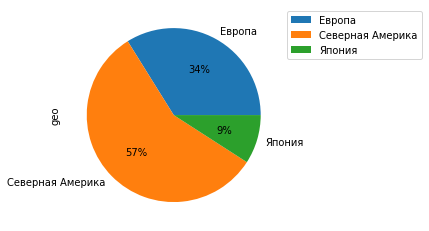

In [21]:
sales_geo = pd.DataFrame({'Name': ['Северная Америка', 'Европа', 'Япония',
                                   ],
                          'geo': [3049.77, 1811.0899999999997, 486.58000000000004]})
  

sales_geo.groupby(['Name']).sum().plot(
    kind='pie', y='geo',autopct='%1.0f%%');
plt.legend(bbox_to_anchor=(1, 1));


In [22]:
data.duplicated().value_counts()

False    16713
dtype: int64

In [23]:
data[data[['name','platform']].duplicated()]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
11714,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08
1590,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
1744,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+,1.17


In [24]:
#check
data[(data["name"] == 'Madden NFL 13')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E,2.85
16228,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
5886,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E,0.30
3985,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,77.0,7.3,E,0.50
7065,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E,0.23


In [25]:
#check
data[(data["name"] == 'Sonic the Hedgehog')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1995,Sonic the Hedgehog,X360,2006.0,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+,1.03
4126,Sonic the Hedgehog,PS3,2006.0,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+,0.48
1744,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+,1.17
257,Sonic the Hedgehog,GEN,1991.0,Platform,3.03,0.91,0.26,0.13,44.0,4.2,Неопределен,4.33


In [26]:
#check
data[(data["name"] == 'Need for Speed: Most Wanted')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6472,Need for Speed: Most Wanted,GBA,2005.0,Racing,0.19,0.07,0.00,0.00,77.5,8.300000,E,0.26
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,77.5,8.377778,Неопределен,2.81
1189,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.500000,T,1.56
6272,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,77.5,8.377778,Неопределен,0.27
2047,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,77.5,8.377778,Неопределен,1.01
5971,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.500000,T,0.29
3580,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.100000,T,0.56
11714,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.500000,T,0.08
1590,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.500000,T,1.25
1997,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.800000,T,1.04


При проверке на дубликаты, выявил 4 строки с дублирование в паре Имя - Платформа. Однако показания в графе продажи отличаются, возможно это особые издания игр, которые не отметили соответвующе при создании общей таблицы, в таком случае не вижу причин для удаления дубликатов, складывать эти значения тоже не корректно,т.к. если мы считаем повтор за отдельное издание, то это полноценный, самостоятельный продукт с идентичным названием

## Исследовательский анализ данных

###  Сколько игр выпускалось в разные годы.
   


Построим график со всеи значениями по годам

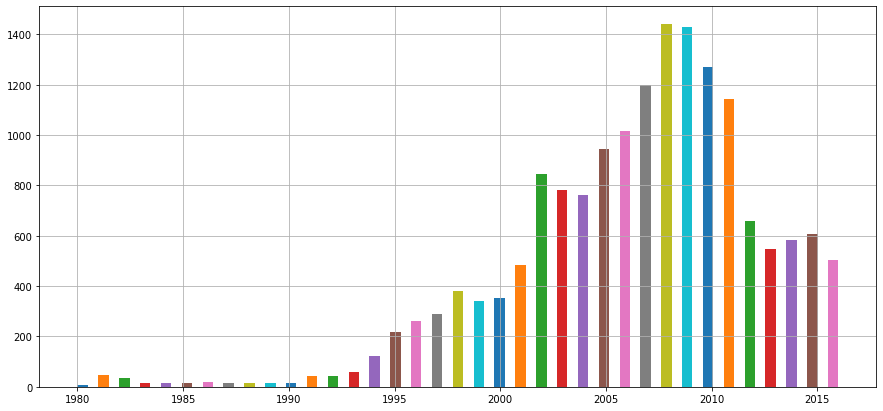

In [27]:
game_per_year = data.groupby('year_of_release')
game_per_year['year_of_release'].hist(
    bins = 73, figsize = (15,7), range =  (1980, 2016));
plt.title = 'обьем выпущенных игр по гоам'

In [28]:
data.groupby('year_of_release')['name'].count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     340
2000.0     351
2001.0     484
2002.0     843
2003.0     782
2004.0     762
2005.0     944
2006.0    1014
2007.0    1199
2008.0    1439
2009.0    1428
2010.0    1269
2011.0    1144
2012.0     660
2013.0     546
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

Также посмотрим на какие платформы выходили игры 

In [29]:
game_per_year['platform'].unique()

year_of_release
1980.0                                               [2600]
1981.0                                               [2600]
1982.0                                               [2600]
1983.0                                          [NES, 2600]
1984.0                                          [NES, 2600]
1985.0                                  [NES, PC, 2600, DS]
1986.0                                          [NES, 2600]
1987.0                                          [NES, 2600]
1988.0                                  [GB, NES, 2600, PC]
1989.0                                      [NES, GB, 2600]
1990.0                                 [NES, GB, SNES, GEN]
1991.0                                 [SNES, NES, GB, GEN]
1992.0                         [SNES, PC, GEN, GB, NES, GG]
1993.0                            [GEN, SNES, NES, NG, SCD]
1994.0      [PS, SAT, SNES, 3DO, GEN, GB, PC, NES, SCD, NG]
1995.0               [PS, SNES, SAT, TG16, NG, GB, 3DO, PC]
1996.0               [PS

Многие платформы забыты как инструмент для внедрения и не актуальны для разработки в наши дни, таким образом, для дальнейшего исследвания можем отсечь данные и по платформам.

### Как менялись продажи по платформам.
 

т.к. нашей целью является прогноз, то ля анализа нам нужен актуальный список платформ, пиковые показатели игр приходятся на 2013 год, проверим что там за платформы 

In [30]:
data.groupby(['platform'])['total_sales'].sum()

platform
2600      96.98
3DO        0.10
3DS      259.00
DC        15.95
DS       806.12
GB       255.46
GBA      317.85
GC       198.93
GEN       28.35
GG         0.04
N64      218.68
NES      251.05
NG         1.44
PC       259.52
PCFX       0.03
PS       730.86
PS2     1255.77
PS3      939.65
PS4      314.14
PSP      294.05
PSV       54.07
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      907.51
WiiU      82.19
X360     971.42
XB       257.74
XOne     159.32
Name: total_sales, dtype: float64

In [31]:
data.query('year_of_release == 2013.0')['platform'].unique()

array(['3DS', 'DS', 'PSP', 'X360', 'PS3', 'WiiU', 'PSV', 'PC', 'PS4',
       'XOne', 'Wii'], dtype=object)

In [32]:
data.query('year_of_release == 2014.0')['platform'].unique()

array(['3DS', 'PS3', 'X360', 'PSV', 'PC', 'PS4', 'XOne', 'PSP', 'WiiU',
       'Wii'], dtype=object)

In [33]:
data.query('year_of_release == 2015.0')['platform'].unique()

array(['3DS', 'PSV', 'PS3', 'PC', 'WiiU', 'PS4', 'X360', 'XOne', 'Wii',
       'PSP'], dtype=object)

За последние несколько лет обосновался явный список платформ в него вошли: 

3DS, PSV, PS3, PC, WiiU, PS4, X360, XOne, Wii, PSP 

Примем их за основные для подсчета данных

In [34]:
sales_platform = data.query("platform == ['3DS', 'PSV', 'PS3', 'PC', 'WiiU', 'PS4', 'X360', 'XOne', 'Wii','PSP']")
sales_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14981,Beyblade Burst,3DS,2016.0,Role-Playing,0.00,0.00,0.03,0.00,0.0,0.0,Неопределен,0.03
1078,Fire Emblem Fates,3DS,2015.0,Role-Playing,0.81,0.23,0.52,0.11,0.0,0.0,Неопределен,1.67
3357,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,0.0,0.0,Неопределен,0.59
13793,Haikyu!! Cross Team Match!,3DS,2016.0,Adventure,0.00,0.00,0.04,0.00,0.0,0.0,Неопределен,0.04
2453,Tales of Xillia 2,PS3,2012.0,Role-Playing,0.20,0.12,0.45,0.07,71.0,7.9,T,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...
16509,th!nk Logic Trainer,Wii,2009.0,Puzzle,0.01,0.00,0.00,0.00,0.0,0.0,Неопределен,0.01
14451,thinkSMART FAMILY!,Wii,2010.0,Misc,0.03,0.00,0.00,0.00,0.0,0.0,E,0.03
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,0.0,E,2.42
15610,uDraw Studio: Instant Artist,X360,2011.0,Misc,0.01,0.01,0.00,0.00,54.0,5.7,E,0.02


Вернемся к рассужению о платформах в слеющем этапе

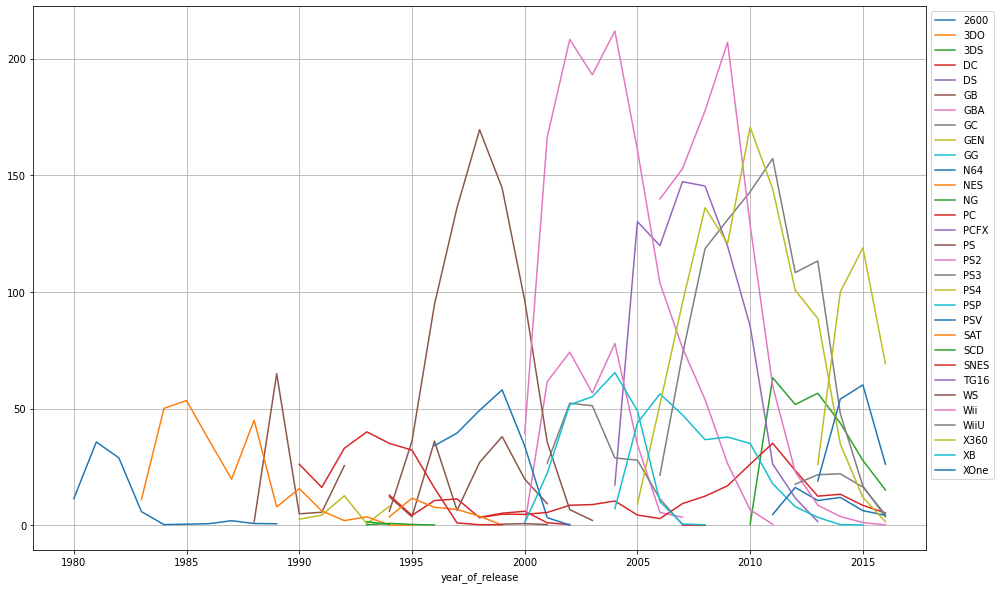

In [35]:
data.pivot_table(
    index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum'
).plot(grid=True, figsize=(16, 10))
plt.legend(bbox_to_anchor=(1, 1))

plt.show()


На графике отчетливо видны пики продаж для консолей старых поколений, но в настоящий момент эти данные нам не особо интересны, т.к. платформы уже не актуальны

###  Выбрать актуальный период.
 

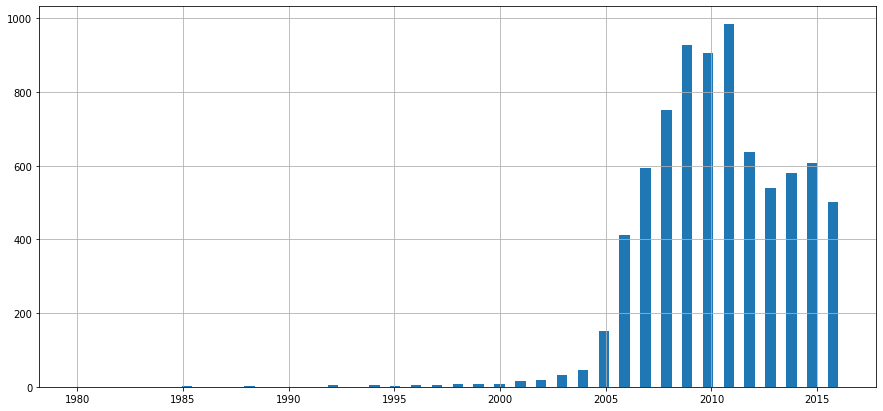

In [36]:
sales_platform['year_of_release'].hist(bins = 73, figsize = (15,7), range =  (1980, 2016));

Отобразим значения продаж  по годам за интересующий период

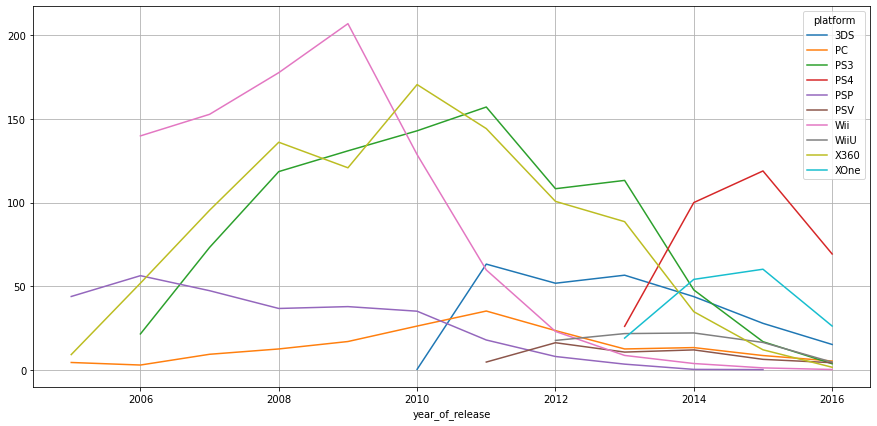

In [37]:
period_data = sales_platform.query("2005 <= year_of_release <= 2016")
period_data.pivot_table(
    index='year_of_release', columns = 'platform', 
                        values='total_sales',
    aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()


маштабируем для последних лет

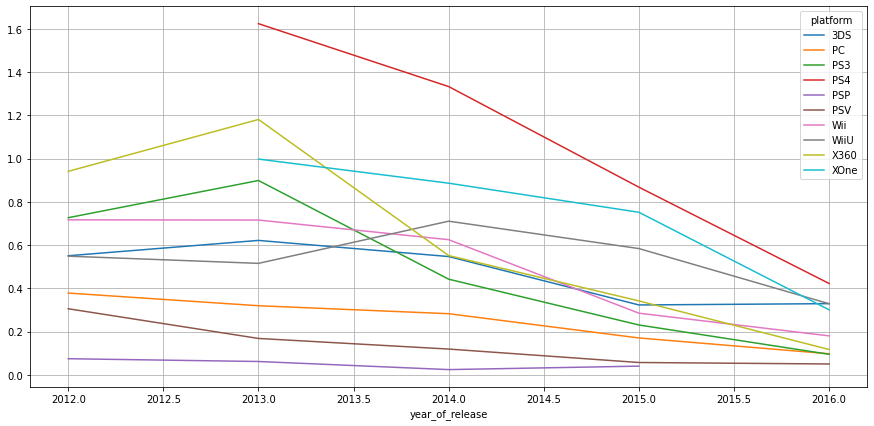

In [38]:
period_data = sales_platform.query("2012 <= year_of_release <= 2016")
period_data.pivot_table(
    index='year_of_release', 
    columns = 'platform', 
    values='total_sales', 
    aggfunc='mean'
).plot(grid=True, figsize=(15, 7))

plt.show()

In [39]:
new_data = period_data.query("platform == ['3DS', 'PSV','PC', 'WiiU', 'PS4', 'XOne']")

Как и предполагалось, проблемы с большой частью пропусков ушли вместе с неактульными данными

### Какие платформы лидируют по продажам, растут или падают?
  

Итак, мы видим, что "отскок"  по продажам есть только у 2х платформ PS4, XOne.

Продажи x360 и ps3 резко упали, платформы просто устарели.Также планомерное падение наблюдаем у Wii и PSP.

Эти платформы также исключаем из актуального пула.

In [40]:
new_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14981,Beyblade Burst,3DS,2016.0,Role-Playing,0.00,0.00,0.03,0.00,0.0,0.0,Неопределен,0.03
1078,Fire Emblem Fates,3DS,2015.0,Role-Playing,0.81,0.23,0.52,0.11,0.0,0.0,Неопределен,1.67
3357,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,0.0,0.0,Неопределен,0.59
13793,Haikyu!! Cross Team Match!,3DS,2016.0,Adventure,0.00,0.00,0.04,0.00,0.0,0.0,Неопределен,0.04
12249,12-Sai. Honto no Kimochi,3DS,2014.0,Adventure,0.00,0.00,0.07,0.00,0.0,0.0,Неопределен,0.07


### Глобальные проажи игр в разбивке по платформам.


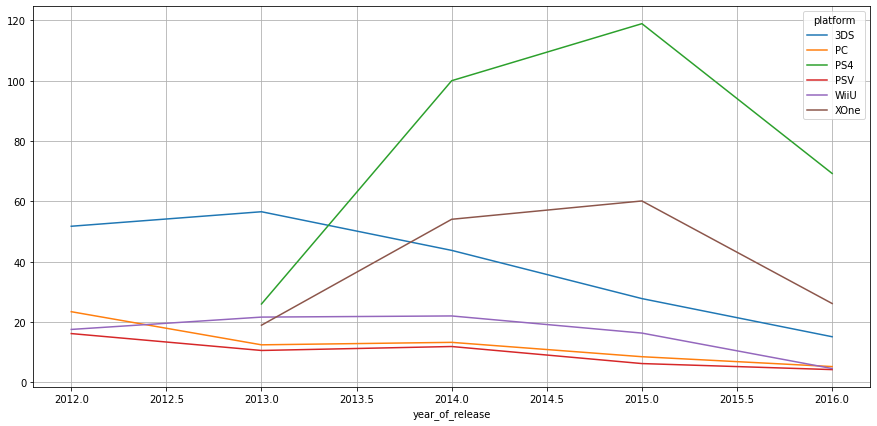

In [41]:
new_data.pivot_table(
    index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum'
).plot(grid=True, figsize=(15, 7));

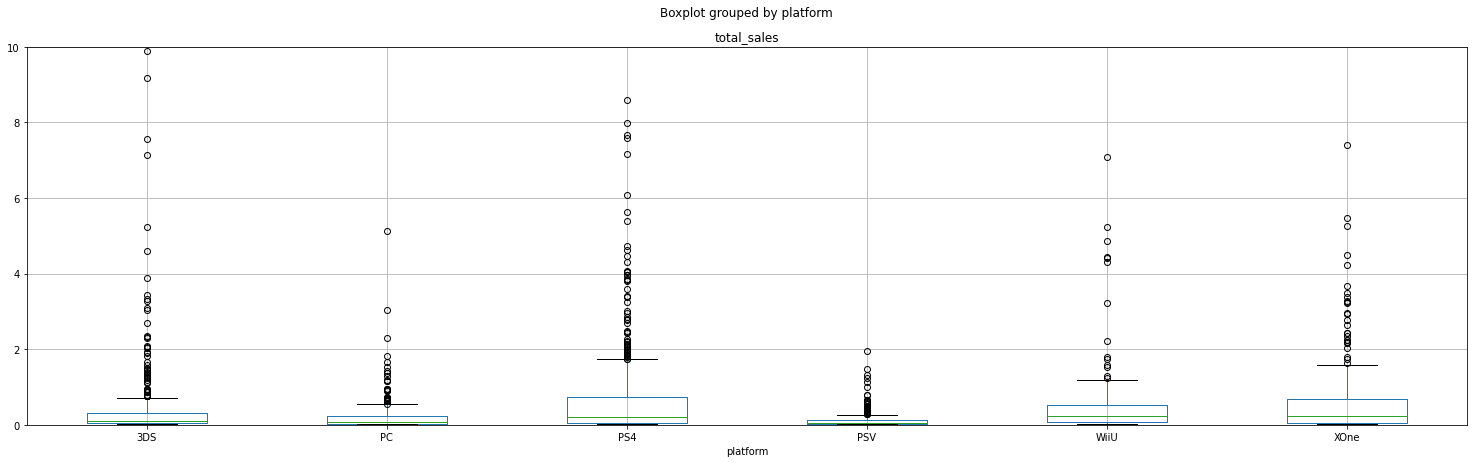

In [42]:
new_data.boxplot(column='total_sales', by='platform', figsize=(25,7))
plt.ylim(0, 10)
plt.show()

Самые большие "выбросы" на платформе 3DS  - вероятнее всего связано с особенностями региона распространения, самые высокие средние показатели за платформами WiiU и XOne, следом PS4 и 3Ds, затем PSV и PC, однако случаев пиковых продаж по игре на PC значительно больше

Итак, по графику, для наший актуальных платформ, самые высокие единовременные продажи показывает PS4, но PC  как платформа значительно дольше в "игре", поэтому стоит посмотреть общую сумму.

In [43]:
new_data.pivot_table(
    index='platform', values = 'total_sales', aggfunc='sum'
).sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
3DS,195.01
XOne,159.32
WiiU,82.19
PC,62.95
PSV,49.18


Итак мы видим, самые высокие продажи у ps4, pc и 3ds - держаться следом с практически одинаковыми показателями, а вот PSV и WiiU имеют совсем скромные продажи на фоне конкурентов

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.


In [44]:
#check
#data.shape

In [45]:
index_names = data[data.user_score != 0]
index_names.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2453,Tales of Xillia 2,PS3,2012.0,Role-Playing,0.20,0.12,0.45,0.07,71.0,7.9,T,0.84
1560,.hack//Infection Part 1,PS2,2002.0,Role-Playing,0.49,0.38,0.26,0.13,75.0,8.5,T,1.26
2989,.hack//Mutation Part 2,PS2,2002.0,Role-Playing,0.23,0.18,0.20,0.06,76.0,8.9,T,0.67
4264,.hack//Outbreak Part 3,PS2,2002.0,Role-Playing,0.14,0.11,0.17,0.04,70.0,8.7,T,0.46
3756,007 Racing,PS,2000.0,Racing,0.30,0.20,0.00,0.03,51.0,4.6,T,0.53


для чистоты теста уберем нули присвоенные пустым значениям в начале исследования

Коэфициент корреляции  общей площади и стоимости обьекта: -0.022


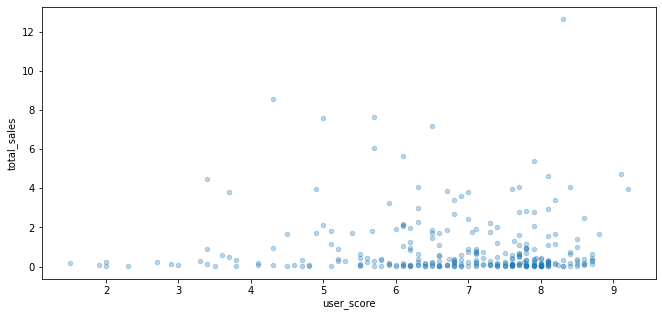

In [46]:
ps4_data = index_names[index_names['platform'] == 'PS4']
ps4_data.plot(kind='scatter',
        y='total_sales' , x='user_score', alpha=0.3, subplots=True, figsize=(11,5));

print(
    'Коэфициент корреляции  общей площади и стоимости обьекта:', 
      ps4_data ['user_score'].corr(ps4_data['total_sales']).round(3)
)


ОТчетливо видны непиковые значения вроде рейтинга в 8.5 и продажами выше 12, однако закономерностью это назвать сложно, скорее наоборот, это можно считать выбросом

Отрицательная корреляция между двумя переменными означает, что одна переменная увеличивается, а другая уменьшается, и наоборот.
В данном случае корреляция слабая, однако вывод можно построить такой : 

При  высоком рейтинге игр, есть вероятность что продажи будут низкие, но она не велика.


А что если дело в платформе попробуем построить диаграммы для других

Коэфициент корреляции  общей площади и стоимости обьекта: 0.001


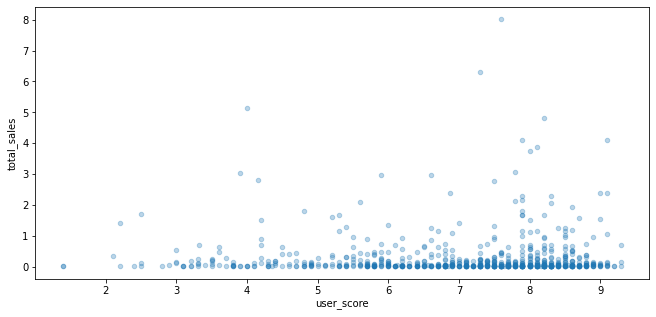

In [47]:
pc_data = index_names[index_names['platform'] == 'PC']
pc_data.plot(kind='scatter',
        y='total_sales' , x='user_score', alpha=0.3, subplots=True, figsize=(11,5));

print(
    'Коэфициент корреляции  общей площади и стоимости обьекта:', 
      pc_data ['user_score'].corr(pc_data['total_sales']).round(3)
)

У платформы PC - cлабая положительная корреляция. Это означает, что когда одна переменная увеличивается, другая переменная также имеет тенденцию к увеличению, но слабым или ненадежным образом.
И того общая картина - Чем выше оценки, тем выше продажи, но отнюдь не всегда

Коэфициент корреляции  общей площади и стоимости обьекта: 0.018


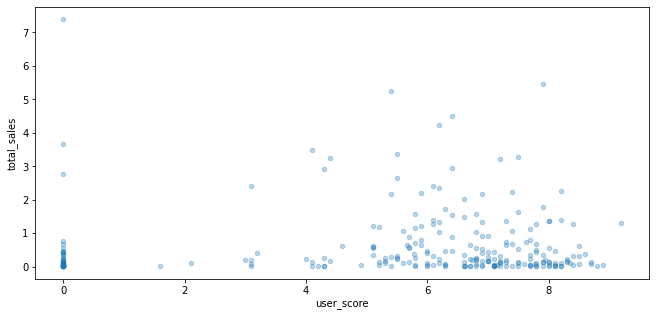

In [48]:
хоne_data = data[data['platform'] == 'XOne']
хоne_data.plot(kind='scatter',
        y='total_sales' , x='user_score', alpha=0.3, subplots=True, figsize=(11,5));

print(
    'Коэфициент корреляции  общей площади и стоимости обьекта:', 
      хоne_data ['user_score'].corr(хоne_data['total_sales']).round(3)

)

Картина весьма схожа с PS4.

Выше рейтинг - ниже продажи, но почти не работает как правило

Иными словами взаимосвязь рейтинга и продаж игры конечно есть, но она минимально, принимать ее во внимание стоит точно не в первую очередь, скорее можно рассматривать как постпродажную аналитику в сравнение с другими продуктами.

### Выводы с продажами игр на других платформах.


Изучим продажи выбранного периода, чтобы более детально сделать вывод на выбранном периоде

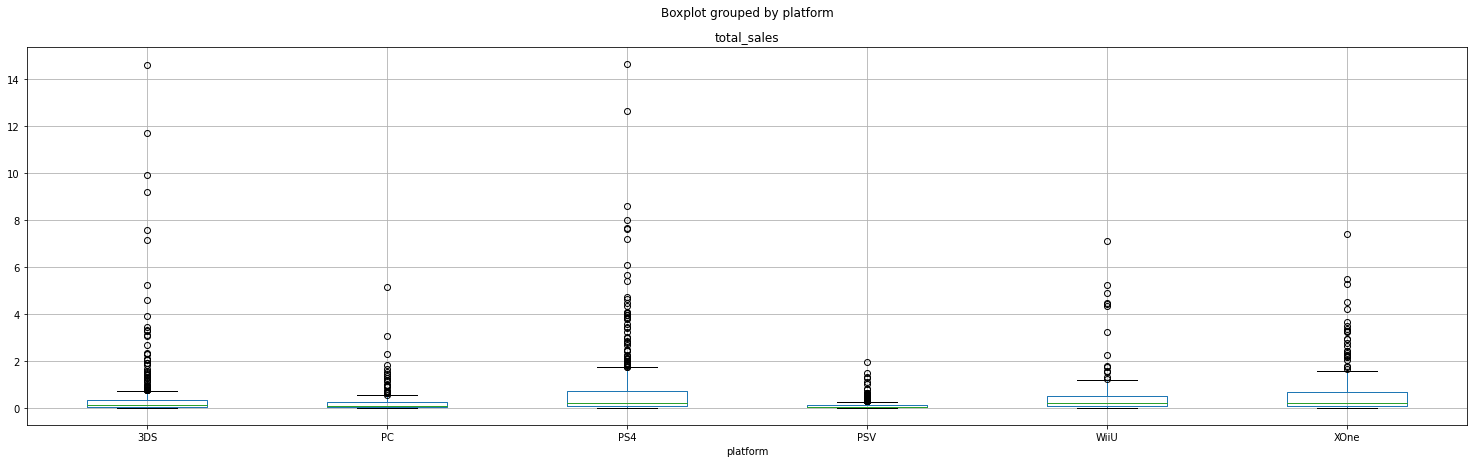

In [49]:
new_data.boxplot(column='total_sales', by='platform', figsize=(25,7))
plt.show()

В представленной диаграмме мы видим, что есть очень редкие выбросы с продажами в 15 млн (видимо эта игра была очень популярная игра), так же редкие, в отличии от других, выбросы есть в диапазоне от 8 до 13 млн. Уберем эти выбросы и еще раз посмотрим на диаграмму размаха.

Все еще много выбросов, вероятно обеспеченых выходом бестселера, попробуем масштабно сгладить углы и уменьшить значения до 5 млн

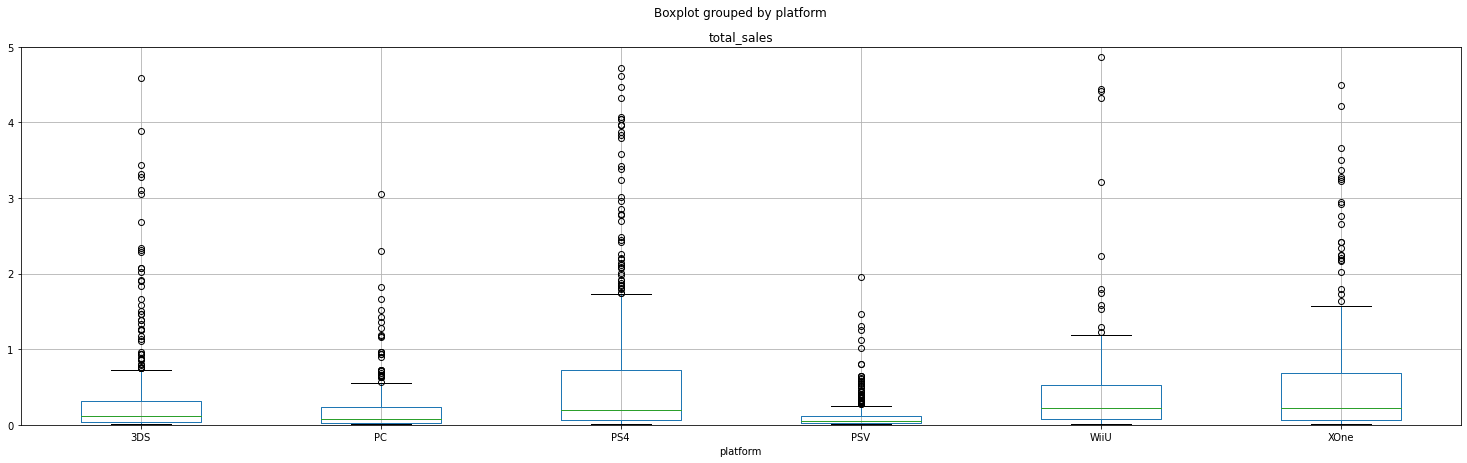

In [50]:
new_data.boxplot(column='total_sales', by='platform', figsize=(25,7))
plt.ylim(0, 5)
plt.show()

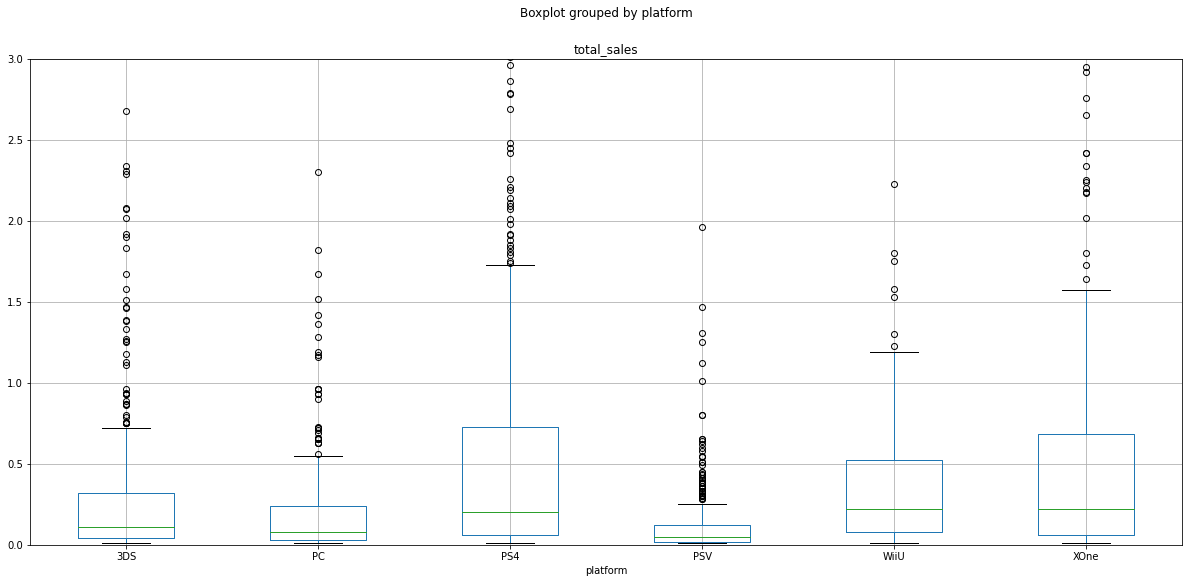

In [51]:
new_data.boxplot(column='total_sales', by='platform', figsize=(20,9))
plt.ylim(0, 3)
plt.show()

Можем выделить несколько платформ -  PS, PS4, Xbox One, WiiU. 

Границы этих платформ высокие, но при всем при этом медиана у всех платформ, кроме PS, PS3 и XBOX360 , не выходит за рамки 0.5 млн продаж, т.к. медиана и размах примерно на одном уровне, можно сказать, что у наших платформ, в отличии от тех, которые не попали в выборку есть намного больше игр, которые покупались намного чаще.

### Общее распределение игр по жанрам.

Изучим самые пополярные жанры для выбранного списка платформ

In [52]:
new_data.pivot_table(
    index='genre',  values='total_sales', aggfunc='mean'
).sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,1.262059
Platform,0.807188
Sports,0.677535
Role-Playing,0.562710
Simulation,0.549474
Fighting,0.502857
Racing,0.465556
Action,0.344103
Misc,0.330078


Shooter - самый популярный жанр игр, Platform оказывается чуть менее популярен
Sports - перепрыгивает Role-Playing, Adventure - стабильный аутсайдер

## Портрет пользователя каждого региона

### Самые популярные платформы (топ-5). 


Рассмотрим уже собранные данные, но в разрезе каждого региона
В нашем распоряжении 3 региона отображенные в таблице как:
* na_sales — продажи в Северной Америке (миллионы проданных копий)
* eu_sales — продажи в Европе (миллионы проданных копий)
* jp_sales — продажи в Японии (миллионы проданных копий

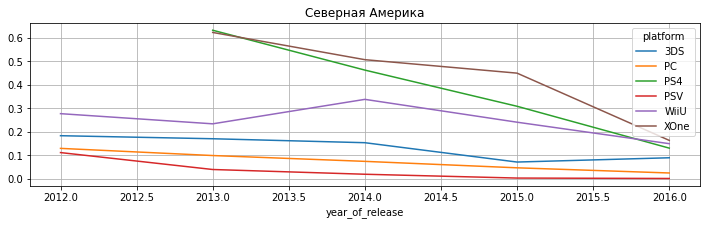

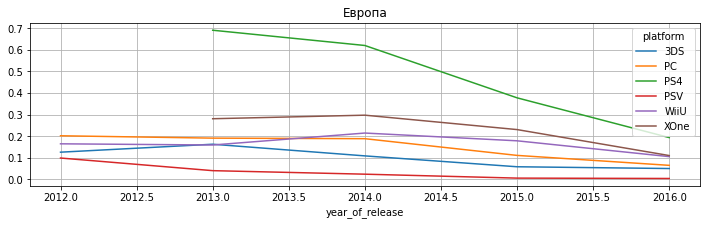

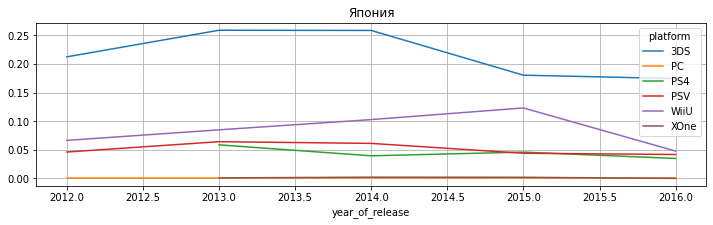

In [53]:
new_data.pivot_table(
    index='year_of_release', columns = 'platform', values='na_sales', aggfunc='mean'
).plot(grid=True, figsize=(12, 3), title='Северная Америка')

new_data.pivot_table(
    index='year_of_release', columns = 'platform', values='eu_sales', aggfunc='mean'
).plot(grid=True, figsize=(12, 3), title='Европа')

new_data.pivot_table(
    index='year_of_release', columns = 'platform', values='jp_sales', aggfunc='mean'
).plot(grid=True, figsize=(12, 3), title='Япония' )


plt.show()

Графическое отображение среза актуальных платформ, ниже срез по всем данным

В Северной Америке главными платформами на актуальную дату среза являются: PS4
, XOne
, 3DS.

В Европе заметно лидирует PS4

в Японии -  3DS не дает конкурентам шансов, однако имеет ярковыраженный нисходящий тренд 


In [54]:
display(new_data.pivot_table(
    index='platform', values='na_sales', aggfunc='mean'
).sort_values(by='na_sales', ascending=False).head())

display(new_data.pivot_table(
    index='platform', values='eu_sales', aggfunc='mean'
).sort_values(by='eu_sales', ascending=False).head())

display(new_data.pivot_table(
    index='platform', values='jp_sales', aggfunc='mean'
).sort_values(by='jp_sales', ascending=False).head())



,na_sales
platform,
XOne,0.377004
PS4,0.277398
WiiU,0.259184
3DS,0.139773
PC,0.076071


,eu_sales
platform,
PS4,0.359923
XOne,0.208866
WiiU,0.170952
PC,0.150675
3DS,0.107884


,jp_sales
platform,
3DS,0.221134
WiiU,0.088503
PSV,0.051192
PS4,0.040714
XOne,0.001377


Из таблиц выше видим что продажи старых консолей за все время превышают нынепиковые, однако не стоит говорить что надовести разработку в этом направлении, как мы выявили раньше, платформы не актуальны, а значит обьемы обусловлены только долгим присутствием товара на рынке

###  Самые популярные жанры (топ-5). 
 

Что касается жанров за все время наблюдений, отличие от общего среза есть только в регионе Япония, там Role-Playing	на уверенном первом месте, вероятно и связано с отличием выбора самой популярной платформы.

В таком случае нужен еще тест, но с актуальными платформами

In [55]:
display(new_data.pivot_table(
    index='genre', values='na_sales', aggfunc='sum'
).sort_values(by='na_sales', ascending=False).head())

display(new_data.pivot_table(
    index='genre', values='eu_sales', aggfunc='sum'
).sort_values(by='eu_sales', ascending=False).head())

display(new_data.pivot_table(
    index='genre', values='jp_sales', aggfunc='sum'
).sort_values(by='jp_sales', ascending=False).head())

,na_sales
genre,
Action,85.63
Shooter,77.76
Role-Playing,46.92
Sports,38.71
Platform,20.82


,eu_sales
genre,
Action,83.40
Shooter,67.62
Sports,41.10
Role-Playing,38.48
Platform,17.81


,jp_sales
genre,
Role-Playing,51.06
Action,34.26
Misc,10.53
Simulation,9.61
Platform,8.55


Изменения ожидаемы,  для Северной Америки и Европы появился Shooter, и они решили что это время пострелять. 

В то время как Японцы все также вживаются в чужую роль в Role-Playing играх

###  Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для понимая колонки rating, необхоимо предоставить их расшифровку:
* «E» («Everyone») — «Для всех»
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «EC» («Early childhood») — «Для детей младшего возраста»
* «K-A» («for Kids to Adults») -«Для детей и подростков »
* «M» («Mature») — «Для взрослых»
* «RP» («Rating Pending») — «Рейтинг ожидается»
* «T» («Teen») — «Подросткам»
* Неопределен - рейтинг не выставлен для данной игры организацией

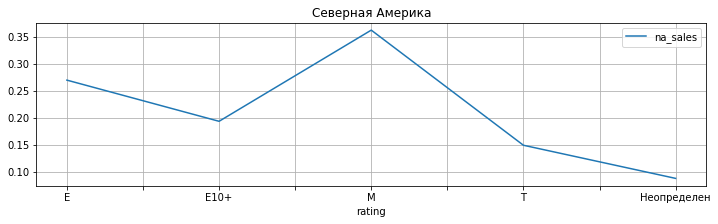

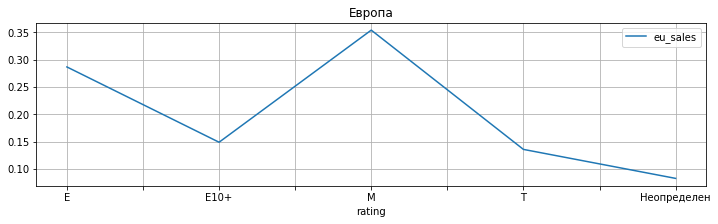

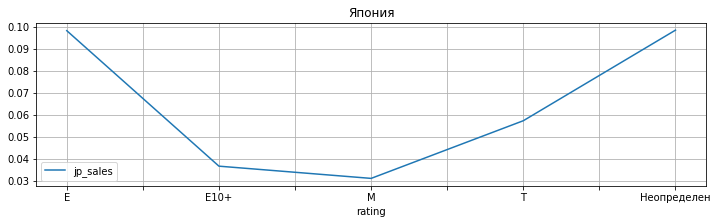

In [56]:
new_data.pivot_table(
    index='rating', values='na_sales', aggfunc='mean'
).plot(grid=True, figsize=(12, 3), title='Северная Америка');
new_data.pivot_table(
    index='rating', values='eu_sales', aggfunc='mean'
).plot(grid=True, figsize=(12, 3), title='Европа');
new_data.pivot_table(
    index='rating', values='jp_sales', aggfunc='mean'
).plot(grid=True, figsize=(12, 3), title='Япония');

plt.show()

В северной Америке, ключевой рейтинг игр - «K-A» («for Kids to Adults») -«Для детей и подростков »

В Европе, это место елят «E» («Everyone») — «Для всех» и «M» («Mature») — «Для взрослых», причем игры «Для взрослых» чуть популярнее

В  Японии более популярны игры рейтинга «E» («Everyone») — «Для всех» 

## Проверка гипотез

### Средние пользовательские рейтинги жанров Action и Sports одинаковые


Средние пользовательские рейтинги жанров Action и Sports одинаковые - принимаем за нулевую гипотезу.

Возьмем 2 среза в которых соберем оценки пользователей по жанрам.

затем используя гипотезу о равенстве средних двух генеральных совокупностей, сожем отвергнуть или не отвергнуть нашу гипотезу

In [57]:
action_rating = new_data[new_data['genre'] == 'Action']

sport_rating = new_data[new_data['genre'] == 'Sports']

alpha = 0.05

results = st.ttest_ind(action_rating['user_score'], sport_rating['user_score']) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha :
      print('Отвергаем нулевую гипотезу')
else:
      print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.034912861596810445
Отвергаем нулевую гипотезу


Нет как их либо подтверждений для опровержения теории о том что "Средние пользовательские рейтинги жанров Action и Sports одинаковые"

### Средние пользовательские рейтинги платформ Xbox One и PC разные


Провернем схожую операцию но со значениями по платформам а не по жанру игры

In [58]:
rating_Xone = new_data[new_data['platform'] == 'XOne']

rating_pc = new_data[new_data['platform'] == 'PC']

alpha = 0.05


results = st.ttest_ind(rating_Xone['user_score'], rating_pc['user_score']) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha :
      print('Отвергаем нулевую гипотезу')
else:
      print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.7167051886889151
Не получилось отвергнуть нулевую гипотезу


По результатам теста - гипотеза о том, что Средние пользовательские рейтинги платформ Xbox One и PC разные - вынуждена быть не отвергнутой

## Общий вывод

Исходя из проделанной работы, напомним про главный ее вопрос.

"Цель: Выявить факторы, определяющие успешность будущего проекта"

Как и во многом золотой таблетки с набором всего необходимого не существует, однако совершенно точно можно опираться на полученные знания для построения маркетинговых компаний или движению "на потоке" с продажами других продуктов.

Первоочередно стоит определить регион для которого будет выпускаться продукт. 
Исходя из этого можно определить жанр и платформу 
*(п.4)* 

Эти факторы не смогут самостоятельно привести продукт к высоким оценков критиков и пользователей.
Однако могут существенно способствовать продажам на старте.

Каков же все-таки алгоритм побора игры для продажи?

Рекомендация подбора успешного продукта ниже:

**Регион**

Есть 3 основных региона:
* Северная Америка
* Европа
* Япония 

Их зоны на рынке располагаются так: 

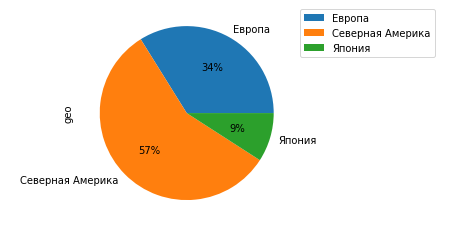

А значит южеты рекламных компаний можно распреелять соответственно.


**Платформа**

Что касается платформы, в ходе исследования выявлены основные: 

* PC
* PS4
* Xbox One
* 3Ds

Остальные платформы либо не актуальны, либо их показатели слишком для причесления к этому списку.
Некоторые из платформ имею преимущество в продажах на определенной территории 
Так например: 

PC  - универсальная платформа, имеет средние или ниже средних показатели продаж во всех регионах

PS4 и Xbox One - лидер в  продажах на территории Европы и Америки, более низкиие показатели в Японии

3Ds - лидирует на территории Японии, но проседает на территории Европы и Америки

**Жанр**

Жанр как и платформа имеет зависимость от региона продаж, ниже список самых популярных по регионам:

*данные указаны в млн копий для актуальных платфор за все время*

Северная Америка
* 1. Action        97.57
* 2. Shooter       92.81
* 3. Role-Playing  59.90	
* 4. Sports	       40.06
* 5. Simulation	   28.34

Европа
* 1. Action	       97.55
* 2. Shooter	   83.39
* 3. Role-Playing  58.04
* 4. Sports	       49.39
* 5. Simulation    37.56

Япония
* 1. Role-Playing	54.29
* 2. Action	        36.54
* 3. Platform	    10.71
* 4. Misc	        10.70
* 5. Simulation	    10.64

<div style="background: #fdf0e8; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='#ed7d2e'><u><b>Заключение</b></u></font>
    <br />
    <font color='#ed7d2e'>
Исходя из общей картины полученных данных, наиболее перспективным считаю такую совокупность параметров

* Регион - Северная Америка, Европа
* Платформа - PS4 \ Xbox One 
* Жанр - Action \ Shooter